**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   EQUIPO: 17

*   NOMBRE: David Hernández Castellanos
*   MATRÍCULA: A01795964
---------------------------------------------
*   NOMBRE: Renzo Felipe Chávez Pulgar
*   MATRÍCULA: A01795959
--------------------------------------------
*   NOMBRE: Abel Jhoan Díaz Escalera
*   MATRÍCULA: A00566705
--------------------------------------------
*   NOMBRE: Jessica Giovana García Gómez
*   MATRÍCULA: A01795922
--------------------------------------------



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 8"
#os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
insurance_df = pd.read_csv('https://github.com/Davhc/data_save/blob/main/insurance.csv?raw=True')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
insurance_df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


1b) Búsqueda de valores faltantes.

In [ ]:
def completitud(df):
    aux = df.isnull().sum().to_frame("n_nulos")
    aux["porcentaje_nulos"] = aux["n_nulos"]/df.shape[0]
    aux["porcentaje_nulos"] = (aux["porcentaje_nulos"]
                               .apply(lambda x: str(round(x*100, 1))+"%") )
    return aux

completitud(insurance_df)

,n_nulos,porcentaje_nulos
age,0,0.0%
sex,0,0.0%
bmi,0,0.0%
children,0,0.0%
smoker,0,0.0%
region,0,0.0%
charges,0,0.0%


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

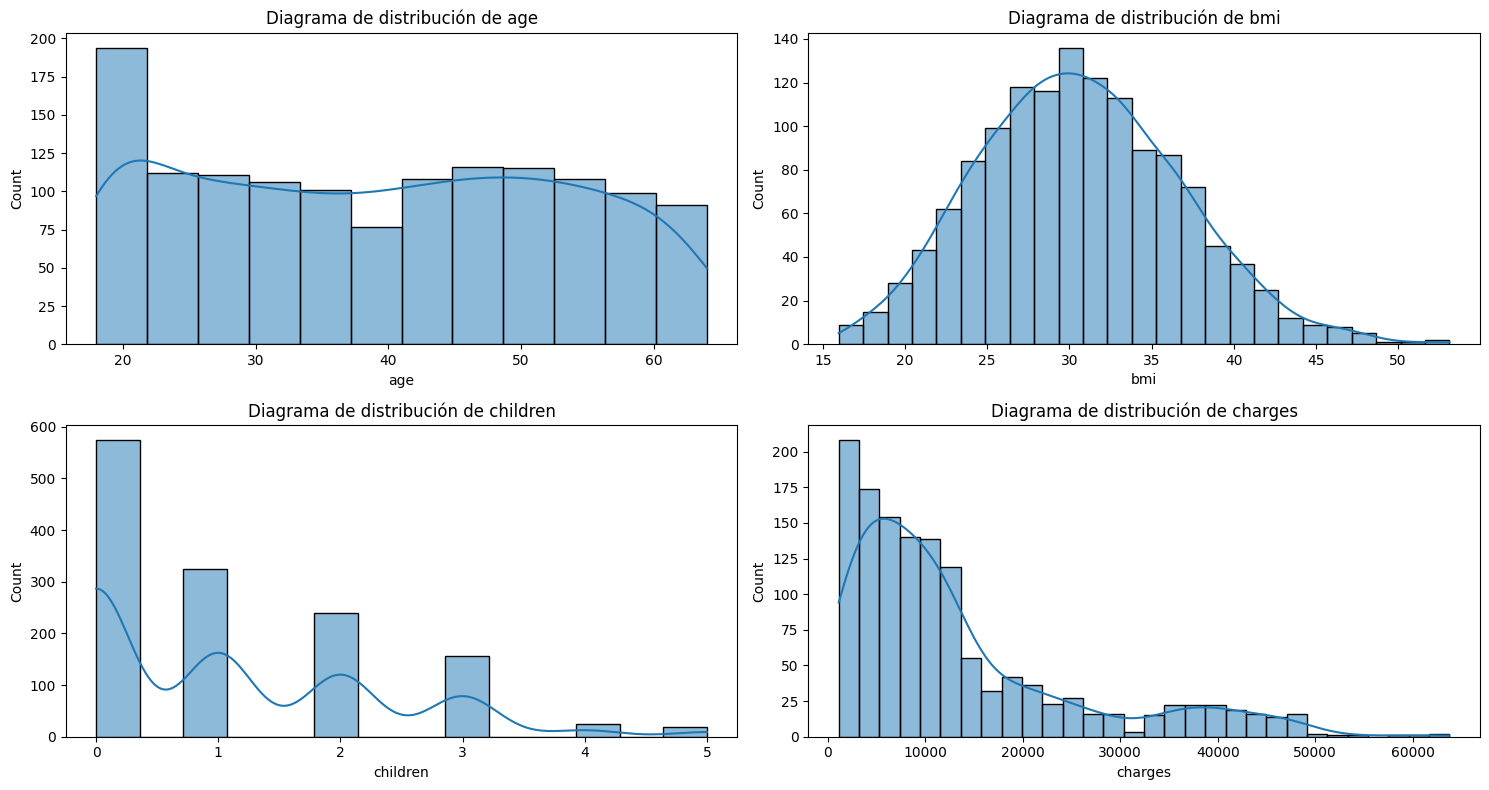

In [ ]:
numeric_df = insurance_df.select_dtypes(include=["int16", "int32", "int64", "float16", "float32", "float64"])

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

for i, columna in enumerate(numeric_df):
    row = i // 2
    col = i % 2
    sns.histplot(data=insurance_df, x=columna, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Diagrama de distribución de {columna}')

plt.tight_layout()
plt.show()

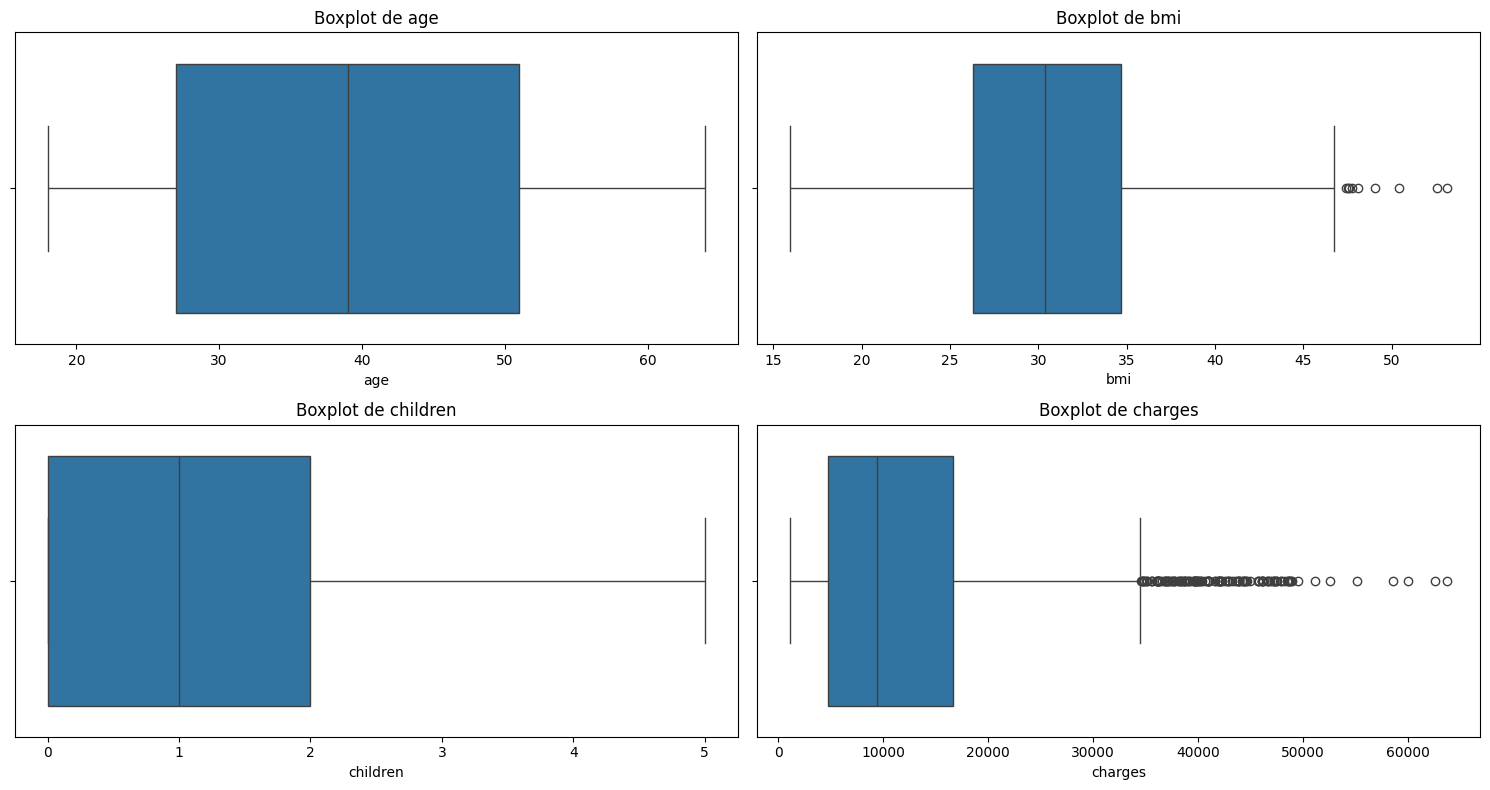

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
for i, columna in enumerate(numeric_df):
    row = i // 2
    col = i % 2
    sns.boxplot(data=insurance_df[columna], orient='h', ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()

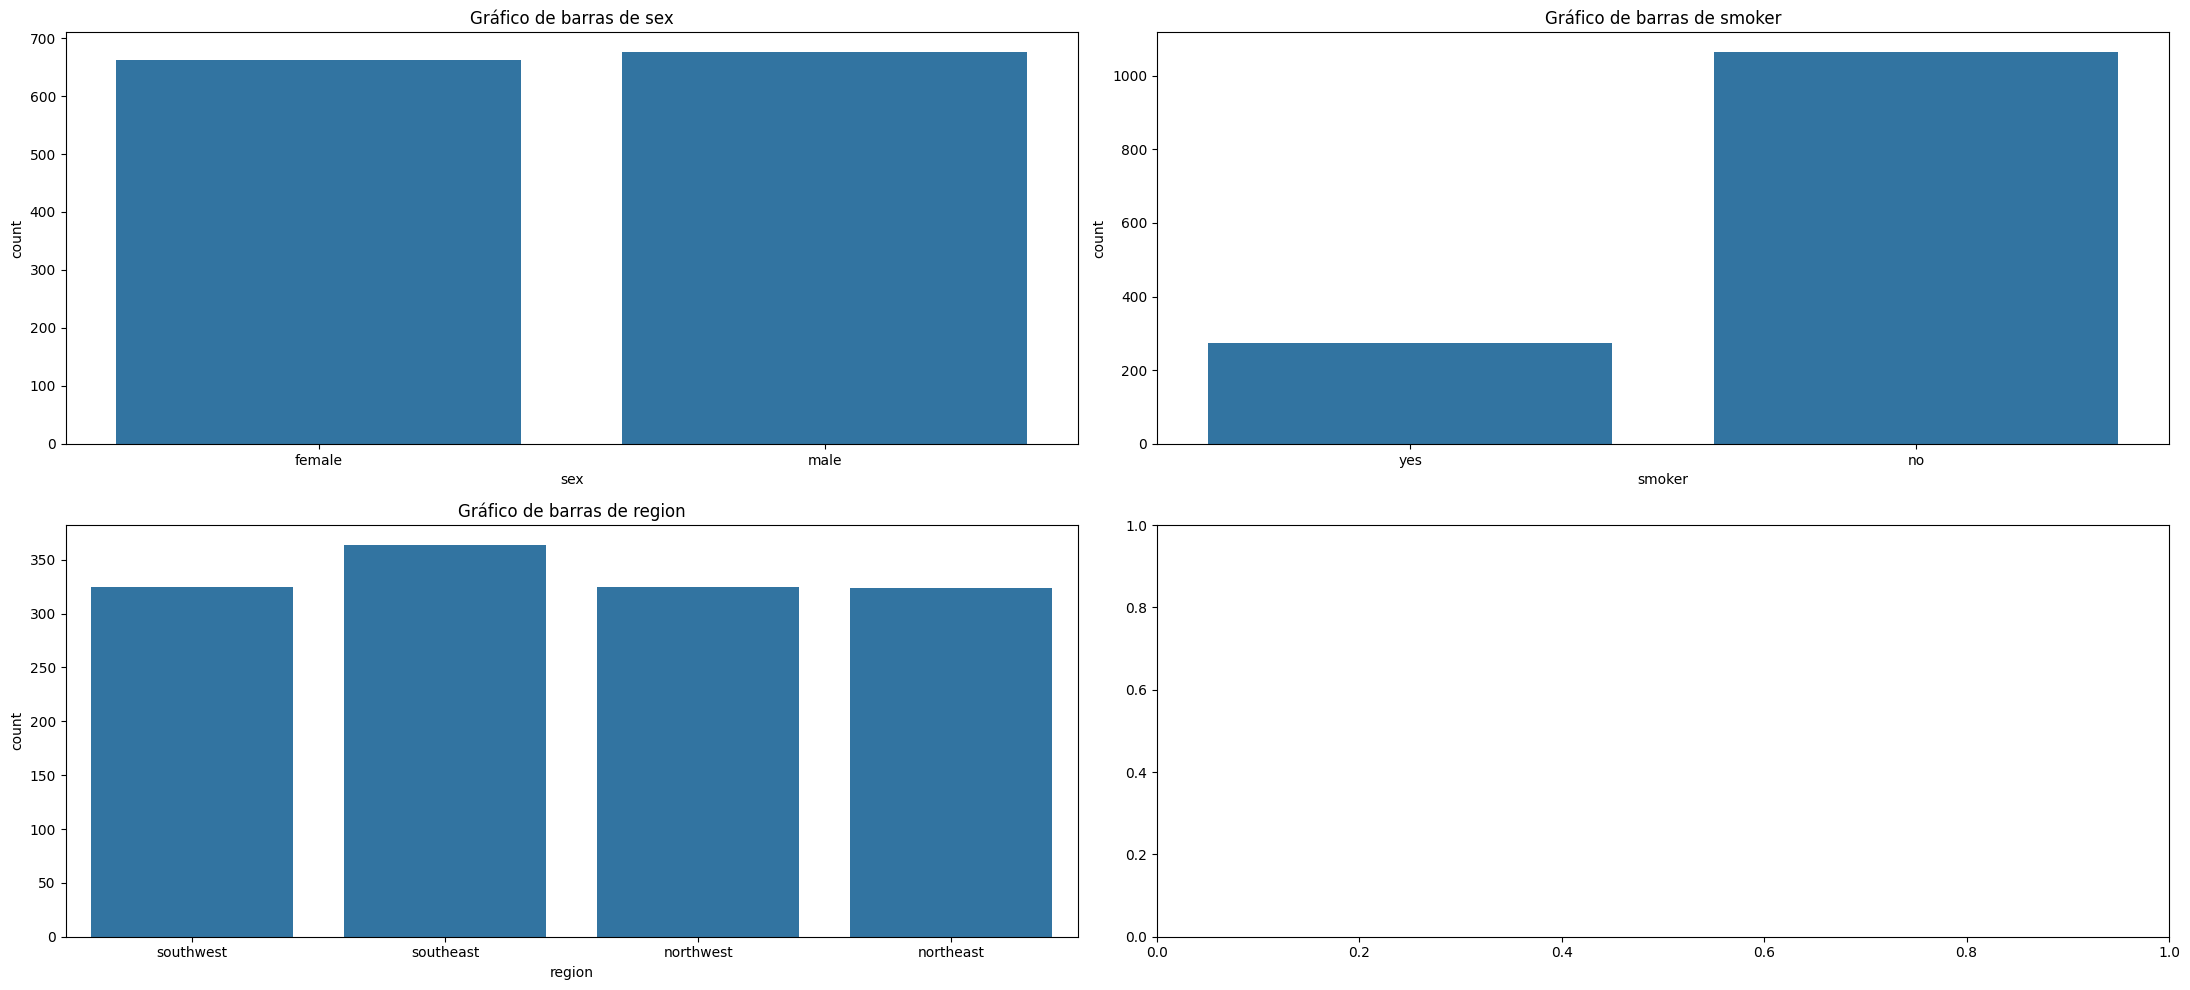

In [ ]:
text_df=insurance_df.select_dtypes(include =["object"])
fig, axes = plt.subplots(2, 2, figsize=(22, 10))

for i, columna in enumerate(text_df):
    row = i // 2
    col = i % 2
    sns.countplot(x=columna, data=insurance_df, ax=axes[row, col])
    axes[row, col].set_title(f'Gráfico de barras de {columna}')

plt.tight_layout()
plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

<Axes: xlabel='charges', ylabel='sex'>

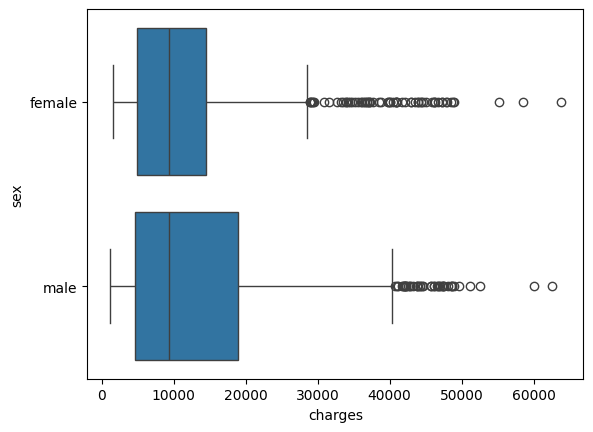

In [ ]:
sns.boxplot(data=insurance_df, x="charges", y="sex")

 Aunque la mediana de 'charges' es similar entre varones y mujeres, los varones presentan un IQR de mayor amplitud y  mayor concentración de valores atípicos, lo que se traduce en mayor variabilidad y dispersión en los datos. De ello se desprende que, en general, 'charges' tiene valores más elevados y variables para los varones en comparación con las mujeres. Es decir, que sí existen la variable 'sex' sí ejerce influencia en la diferenciación de primas.

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

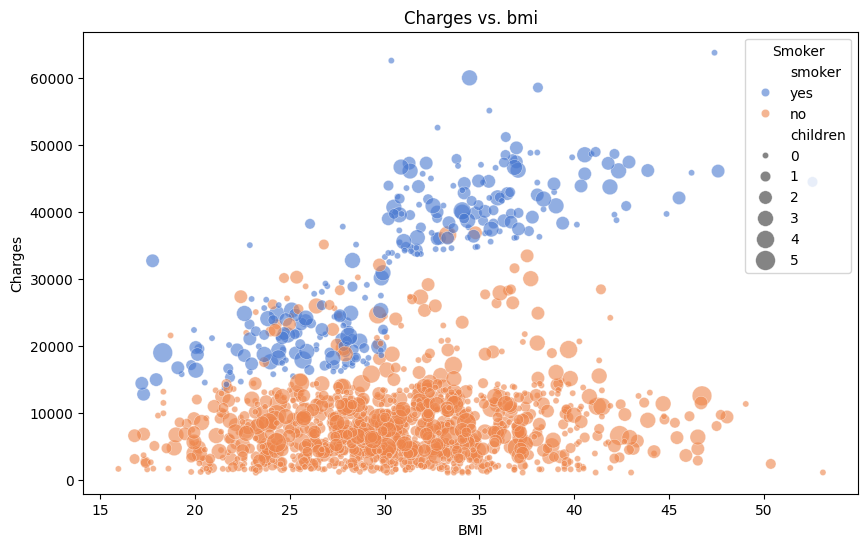

In [ ]:
plt.figure(figsize=(10,6))
scatter_plot=sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker',  size='children', sizes=(20,200), alpha=0.6, palette='muted', edgecolor='w', legend='brief')
plt.title('Charges vs. bmi')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

El diagrama de dispersión muestra que la variable 'smoker' incrementa significativamente la variable 'charges', especialmente cuando se combina con un 'BMI' alto. Además, aunque 'BMI' tiene una relación positiva con 'charges', su impacto es más pronunciado en fumadores que en no fumadores. La cantidad de hijos ('children') tiene menos impacto directo en 'charges' en comparación con las variables 'smoker' y 'BMI'.

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

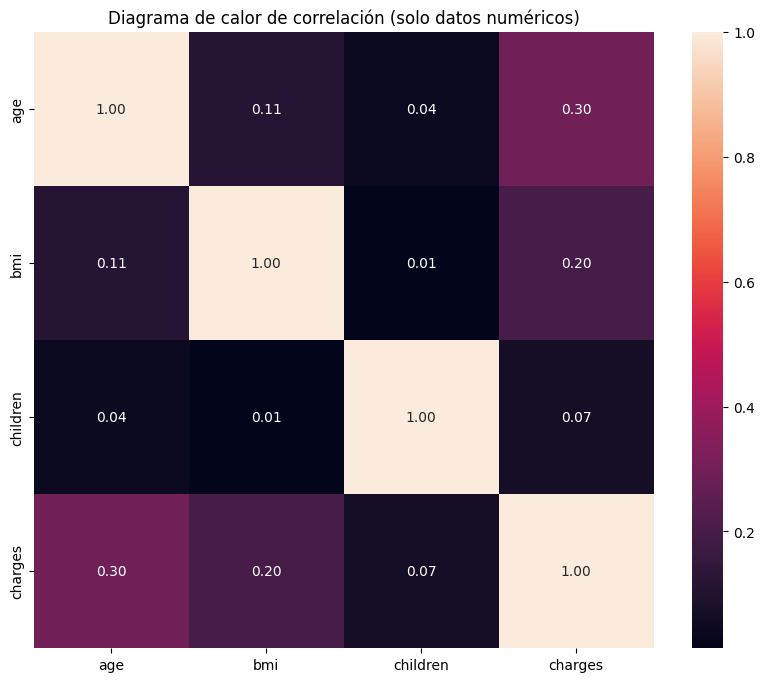

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title('Diagrama de calor de correlación (solo datos numéricos)')
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

In [ ]:
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_df = insurance_df[(insurance_df['charges'] < lower_bound) | (insurance_df['charges'] > upper_bound)]

mean_age = outliers_df['age'].mean()
mean_bmi = outliers_df['bmi'].mean()

print('Promedio de age: ',mean_age,' y bmi: ',mean_bmi,'en dataframe de valores atípicos')

Promedio de age:  41.07913669064748  y bmi:  35.564604316546756 en dataframe de valores atípicos


3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [ ]:
percent_sex = outliers_df['sex'].value_counts(normalize=True) * 100
percent_smoker = outliers_df['smoker'].value_counts(normalize=True) * 100

print("Porcentajes por sexo:")
print(percent_sex)
print("\nPorcentajes por hábito de fumar:")
print(percent_smoker)

Porcentajes por sexo:
sex
male      64.028777
female    35.971223
Name: proportion, dtype: float64

Porcentajes por hábito de fumar:
smoker
yes    97.841727
no      2.158273
Name: proportion, dtype: float64


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [ ]:
X = insurance_df.drop(columns=['charges'])
y = insurance_df['charges']

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=insurance_df['smoker'])

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessing = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = Pipeline([
    ('preprocessing', preprocessing),
    ('regression', LinearRegression())
])

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2:", r2)

RMSE: 5699.034312583929
R2: 0.7538310056936607


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [ ]:
y_train_no_outliers = y_train.copy()
y_train_no_outliers = (y_train_no_outliers.apply(lambda x: upper_bound
                                                 if x >upper_bound else x))

y_test_no_outliers = y_test.copy()
y_test_no_outliers = (y_test_no_outliers.apply(lambda x: upper_bound
                                               if x >upper_bound else x))

lr_model2 = Pipeline([
    ('preprocessing', preprocessing),
    ('regression', LinearRegression())
])

lr_model2.fit(X_train, y_train_no_outliers)

y_pred2 = lr_model2.predict(X_test)

rmse_2 = mean_squared_error(y_test_no_outliers, y_pred2, squared=False)
r2_2 = r2_score(y_test_no_outliers, y_pred2)

print("\nLR Pipeline 2 (Sin outliers en y_train y y_test):")
print("RMSE:", rmse_2)
print("R2:", r2_2)


LR Pipeline 2 (Sin outliers en y_train y y_test):
RMSE: 4811.64707564978
R2: 0.7638183449800402


In [ ]:
print("Variación en rmse: ", round(1-rmse_2/rmse,2)*100,"%")
print("Variación en r2: ", round((r2_2/r2)-1,2)*100,"%")

Variación en rmse:  16.0 %
Variación en r2:  1.0 %


Hay mejora en el algoritmo, quizá en cuanto a la varianza explicada por el modelo no hay una mejora considerable (R2 ~1%) pero si hay una mejora importante con respecto a la diferencia promedio esperada entre predicción y valor real, una reducción del 16% del error. (RMSE)

9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OrdinalEncoder(), categorical_features)
    ])

lr_model3 = Pipeline([
    ('preprocessing', preprocessing2),
    ('regression', LinearRegression())
])

lr_model3.fit(X_train, y_train_no_outliers)

y_pred3 = lr_model3.predict(X_test)

rmse_3 = mean_squared_error(y_test_no_outliers, y_pred3, squared=False)
r2_3 = r2_score(y_test_no_outliers, y_pred3)

print("\nLR Pipeline 3 (Escalamiento estándar para numéricos y codificación ordinal para categóricos):")
print("RMSE:", rmse_3)
print("R2:", r2_3)


LR Pipeline 3 (Escalamiento estándar para numéricos y codificación ordinal para categóricos):
RMSE: 4811.600670456455
R2: 0.7638229005936741


No hay mejora producida por el cambio de transformación

10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def serch_degree(x_train,y_train,x_test,y_test,n=2):
    lr_model4 = Pipeline([
    ('preprocessing', preprocessing),
    ('polynomial_features', PolynomialFeatures(degree=n)),
    ('regression', LinearRegression())
    ])

    lr_model4.fit(x_train, y_train)

    y_pred4 = lr_model4.predict(x_test)

    rmse_4 = mean_squared_error(y_test, y_pred4, squared=False)
    r2_4 = r2_score(y_test, y_pred4)

    print(f"\nPolynomial Regression (degree={n}):")

    print("RMSE:", rmse_4)
    print("R2:", r2_4)



In [ ]:
for x in range(1,6):
    serch_degree(X_train, y_train_no_outliers, X_test, y_test_no_outliers,n=x)


Polynomial Regression (degree=1):
RMSE: 4812.06172831982
R2: 0.7637776364359082

Polynomial Regression (degree=2):
RMSE: 4314.9098306102305
R2: 0.8100662773725991

Polynomial Regression (degree=3):
RMSE: 4568.055285174011
R2: 0.7871266308609502

Polynomial Regression (degree=4):
RMSE: 5463.740821084813
R2: 0.6954638795414905

Polynomial Regression (degree=5):
RMSE: 12935.202226474854
R2: -0.7068882023267233


El mejor es el de 2 grados, en el resto de pruebas vamos provocando cierto sobreajuste en el modelo

In [ ]:
lr_model4 = Pipeline([
('preprocessing', preprocessing),
('polynomial_features', PolynomialFeatures(degree=2)),
('regression', LinearRegression())
])

lr_model4.fit(X_train, y_train_no_outliers)

y_pred4 = lr_model4.predict(X_test)

rmse_4 = mean_squared_error(y_test_no_outliers, y_pred4, squared=False)
r2_4 = r2_score(y_test_no_outliers, y_pred4)

print(f"\nPolynomial Regression (degree=2):")

print("RMSE:", rmse_4)
print("R2:", r2_4)


Polynomial Regression (degree=2):
RMSE: 4314.9098306102305
R2: 0.8100662773725991


In [ ]:
print("Variación en rmse: ", round(1-rmse_4/rmse_2,2)*100,"%")
print("Variación en r2: ", round((r2_4/r2_2)-1,2)*100,"%")

Variación en rmse:  10.0 %
Variación en r2:  6.0 %


In [ ]:
print("Variación en rmse acumulada por modificaciones: ", round(1-rmse_4/rmse,2)*100,"%")
print("Variación en r2 acumulada por modificaciones: ", round(((r2_4/r2)-1)*100,2),"%")

Variación en rmse acumulada por modificaciones:  24.0 %
Variación en r2 acumulada por modificaciones:  7.46 %
